In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn import cluster, datasets, mixture, metrics
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer

%matplotlib inline

In [2]:
header_list = ["age","class of worker","detailed industry recode","detailed occupation recode","education","wage per hour","enroll in edu inst last wk","marital stat","major industry code","major occupation code","race","hispanic origin","sex","member of a labor union","reason for unemployment","full or part time employment stat","capital gains","capital losses","dividends from stocks","tax filer stat","region of previous residence","state of previous residence","detailed household and family stat","detailed household summary in household","instance weight","migration code-change in msa","migration code-change in reg","migration code-move within reg","live in this house 1 year ago","migration prev res in sunbelt","num persons worked for employer","family members under 18","country of birth father","country of birth mother","country of birth self","citizenship","own business or self employed","fill inc questionnaire for veteran's admin","veterans benefits","weeks worked in year","year","ignore"]
data = pd.read_csv('G:\My Drive\FH_Technikum\MSC\Semester_2_SS2022\DAS\DataVisualization\Data\CensusIncome\census-income.data', names=header_list)
data = data.drop(["ignore"], axis=1)

In [3]:
data["education"] = data["education"].str.strip()

data["education_consolidated"] = data["education"].apply(lambda value: "lower" if value == "Children" 
                                                                        or value == "7th and 8th grade" 
                                                                        or value == "9th grade" 
                                                                        or value == "10th grade" 
                                                                        or value == "High school graduate" 
                                                                        or value == "11th grade" 
                                                                        or value == "12th grade no diploma" 
                                                                        or value == "5th or 6th grade" 
                                                                        or value == "Less than 1st grade" 
                                                                        or value == "Some college but no degree"
                                                                    else "higher")
data["class of worker"] = pd.Categorical(data["class of worker"].str.strip())
data["detailed industry recode"] = pd.Categorical(data["detailed industry recode"], ordered=True)
data["detailed occupation recode"] = pd.Categorical(data["detailed occupation recode"],  ordered=True)
data["education"] = pd.Categorical(data["education"].str.strip())
data["enroll in edu inst last wk"] = pd.Categorical(data["enroll in edu inst last wk"].str.strip())
data["marital stat"] = pd.Categorical(data["marital stat"].str.strip())
data["major industry code"] = pd.Categorical(data["major industry code"].str.strip())
data["major occupation code"] = pd.Categorical(data["major occupation code"].str.strip())
data["race"] = pd.Categorical(data["race"].str.strip())
data["hispanic origin"] = pd.Categorical(data["hispanic origin"].str.strip())
data["sex"] = pd.Categorical(data["sex"].str.strip())
data["member of a labor union"] = pd.Categorical(data["member of a labor union"].str.strip())
data["reason for unemployment"] = pd.Categorical(data["reason for unemployment"].str.strip())
data["full or part time employment stat"] = pd.Categorical(data["full or part time employment stat"].str.strip())
data["tax filer stat"] = pd.Categorical(data["tax filer stat"].str.strip())
data["region of previous residence"] = pd.Categorical(data["region of previous residence"].str.strip())
data["state of previous residence"] = pd.Categorical(data["state of previous residence"].str.strip())
data["detailed household and family stat"] = pd.Categorical(data["detailed household and family stat"].str.strip())
data["detailed household summary in household"] = pd.Categorical(data["detailed household summary in household"].str.strip())
data["migration code-change in msa"] = pd.Categorical(data["migration code-change in msa"].str.strip())
data["migration code-change in reg"] = pd.Categorical(data["migration code-change in reg"])
data["migration code-move within reg"] = pd.Categorical(data["migration code-move within reg"].str.strip())
data["live in this house 1 year ago"] = pd.Categorical(data["live in this house 1 year ago"].str.strip())
data["migration prev res in sunbelt"] = pd.Categorical(data["migration prev res in sunbelt"].str.strip())
data["family members under 18"] = pd.Categorical(data["family members under 18"].str.strip())
data["country of birth father"] = pd.Categorical(data["country of birth father"].str.strip())
data["country of birth mother"] = pd.Categorical(data["country of birth mother"].str.strip())
data["country of birth self"] = pd.Categorical(data["country of birth self"].str.strip())
data["citizenship"] = pd.Categorical(data["citizenship"].str.strip())
data["own business or self employed"] = pd.Categorical(data["own business or self employed"],  ordered=True)
data["fill inc questionnaire for veteran's admin"] = pd.Categorical(data["fill inc questionnaire for veteran's admin"].str.strip())
data["veterans benefits"] = pd.Categorical(data["veterans benefits"],  ordered=True)

data = data[data['wage per hour'] > 0]
data['member of a labor union'].cat.remove_unused_categories()

data.describe()


,age,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,weeks worked in year,year
count,11304.000000,11304.000000,11304.000000,11304.000000,11304.000000,11304.000000,11304.000000,11304.000000,11304.000000
mean,36.752565,978.321214,283.690110,41.818117,103.779282,1802.356977,4.006458,45.128008,94.498673
std,13.126835,656.483129,2685.274108,280.660852,1087.050193,1012.007635,1.924077,13.600556,0.500020
min,15.000000,20.000000,0.000000,0.000000,0.000000,62.370000,0.000000,0.000000,94.000000
25%,26.000000,584.750000,0.000000,0.000000,0.000000,1117.837500,2.000000,46.000000,94.000000
50%,35.000000,800.000000,0.000000,0.000000,0.000000,1690.315000,4.000000,52.000000,94.000000
75%,46.000000,1200.000000,0.000000,0.000000,0.000000,2295.250000,6.000000,52.000000,95.000000
max,90.000000,9999.000000,99999.000000,2824.000000,45000.000000,12184.500000,6.000000,52.000000,95.000000


<AxesSubplot:xlabel='wage per hour', ylabel='age'>

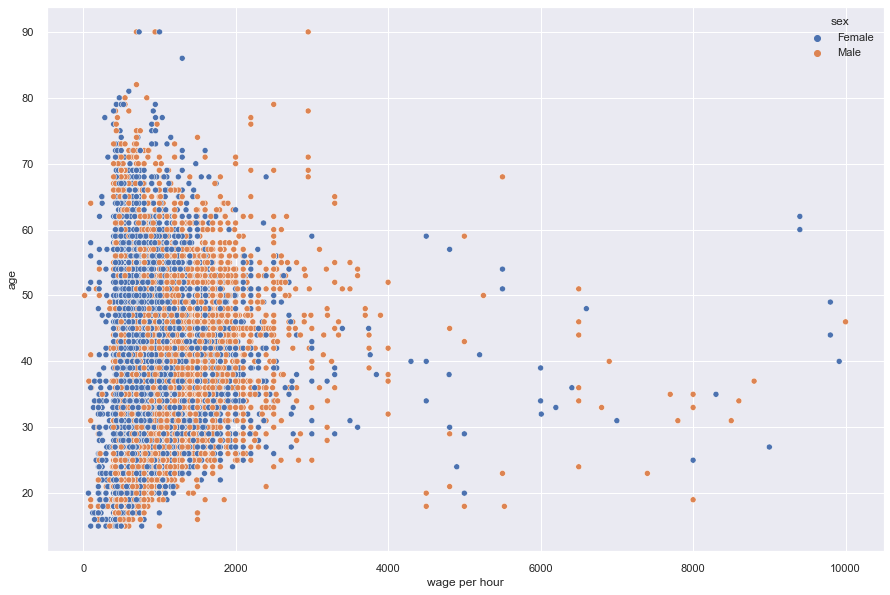

In [4]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.scatterplot(x='wage per hour', y='age', data=data, hue='sex')

One would expect people with higher education to earn more. Also, people in their middle (from 4 to 50) age range should earn the most. Due to the density of the visualization, it is, however, questionable if clustering methods based on random initialisation of starting points for clusters (like k-means) and eulidean distance as the distance metric could discern these clusters. I also do not know the amount of clusters that should be found. Higher and lower education categories do not fit especially well as clusters, since they can't be discerned clearly with euclidean distance measure.

Therefore, I am considering Affinity Propagation (https://michael-fuchs-python.netlify.app/2020/06/29/affinity-propagation/) as my first clustering method. It does not require the definition of clusters beforehand. It is a partition clustering method.

How to: https://www.projectpro.io/recipes/do-affinity-based-clustering-in-python

In [5]:
selected_features = data[['wage per hour', 'age']]

n = StandardScaler().fit_transform(selected_features)
scaled_features_df = pd.DataFrame(n, index=selected_features.index, columns=selected_features.columns)

To get consistent and correct results, normalization has to be performed.

# Agglomarative Clustering (Hierarchical)

As the most comprehensive method of clustering, I chose to start with agglomarative clustering.

This method builds up a dendogram and uses a distance metric to determin which datapoints should be grouped together. It starts by viewing each datapoint as a separate group and iteratively groups them together (as seen in the dendogram below).

It yielded the following results:

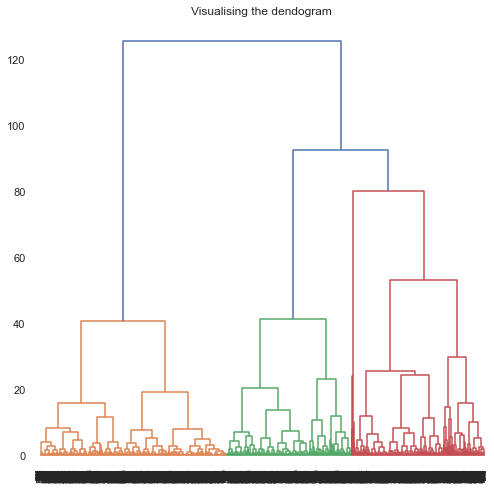

In [6]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the dendogram')
Dendrogram = shc.dendrogram((shc.linkage(scaled_features_df, method ='ward')))

For n_clusters = 2 The average silhouette_score is : 0.3574442599333413
For n_clusters = 3 The average silhouette_score is : 0.40301920465599866
For n_clusters = 4 The average silhouette_score is : 0.4126219279648044
For n_clusters = 5 The average silhouette_score is : 0.3871537570721846
For n_clusters = 6 The average silhouette_score is : 0.3585623148878142


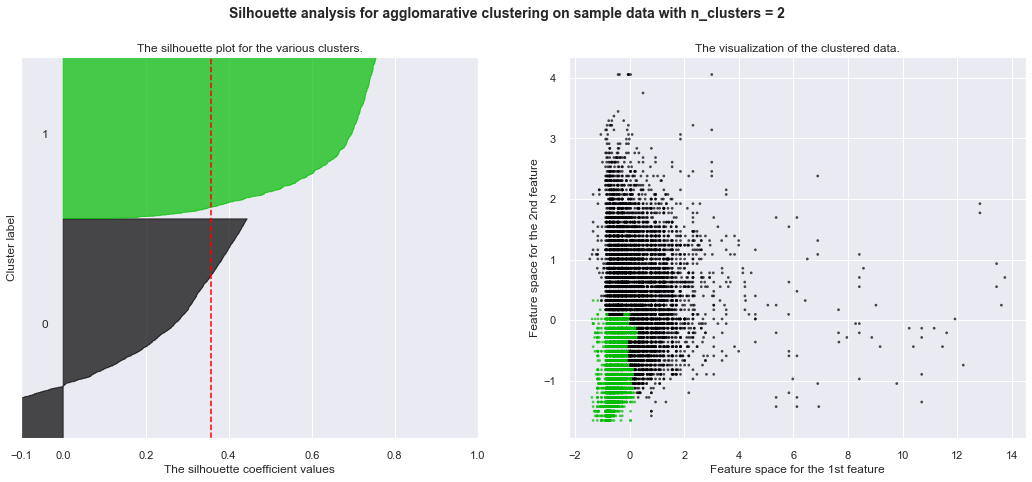

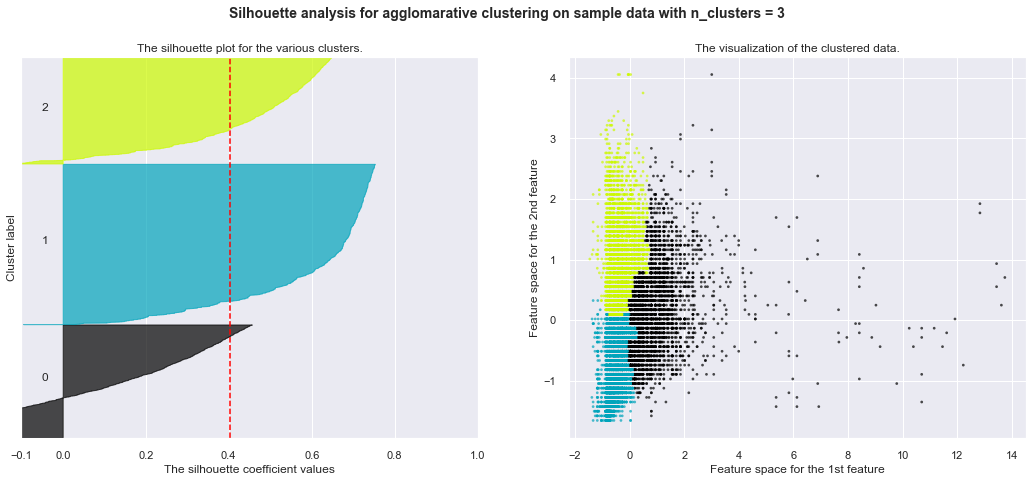

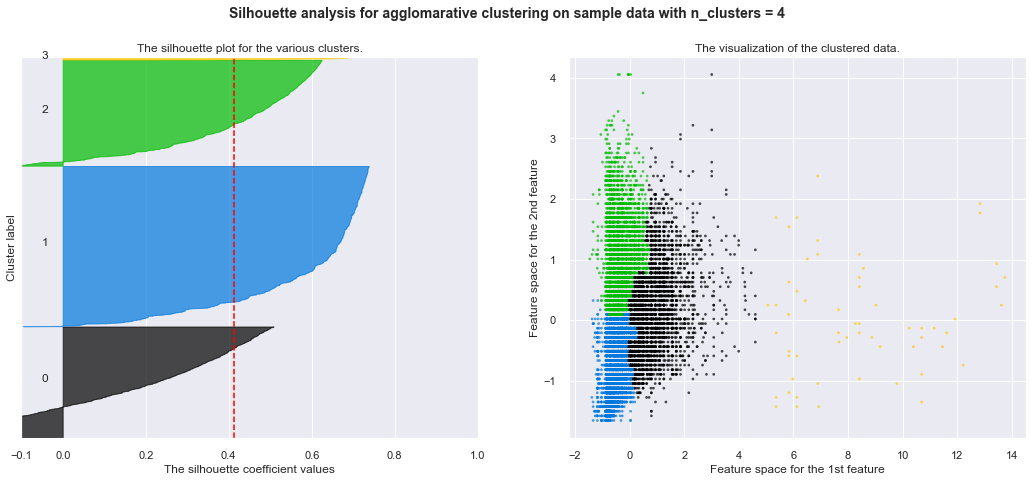

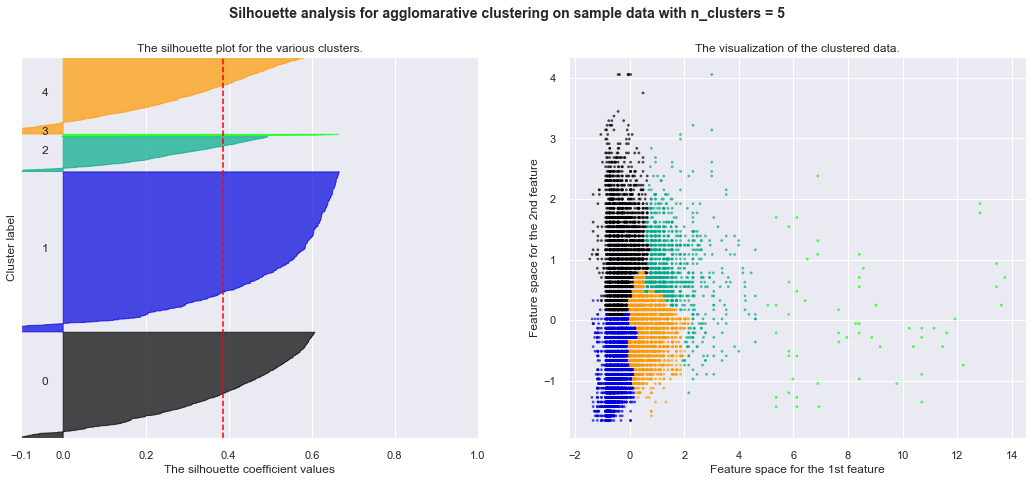

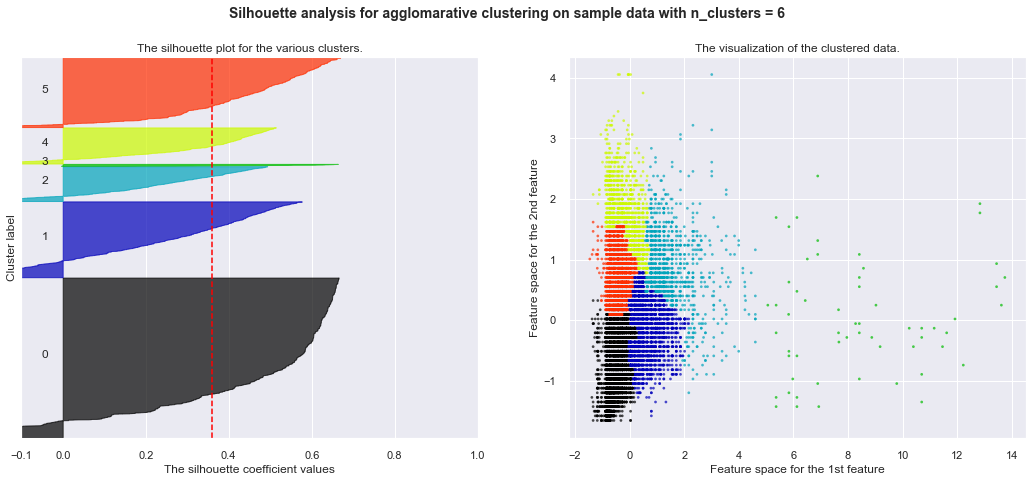

In [7]:
clustersList = [2,3,4,5,6]

for n_clusters in clustersList:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_features_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = cluster.AgglomerativeClustering(n_clusters = n_clusters)
    cluster_labels = clusterer.fit_predict(scaled_features_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(scaled_features_df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(scaled_features_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        scaled_features_df['wage per hour'], scaled_features_df['age'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for agglomarative clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


Jusging by the average silhouette score, 4 clusters seem to be the best fitting number of clusters for this dataset. However, with 4 clusters, the average silhouette score is only 0.41.

# Gaussian Mixture (Partitive Clustering)

Since the data is strongly clumped up, I expected not to find a useful difference between the available partitive clustering methods known to me.

As partitive clustering method, it needs a number as the basis for the number of clusters to produce. It is based ona probabilistic model which assumes all the datapoints are created using a gaussian distribution. Datapoints can belong to multiple clusters (probability is provided).

Therefore I chose to try gaussian mixture, which yielded the following results:

For n_clusters = 2 The average silhouette_score is : 0.39369381855988894
For n_clusters = 3 The average silhouette_score is : 0.37593933352185827
For n_clusters = 4 The average silhouette_score is : 0.29852325310227457
For n_clusters = 5 The average silhouette_score is : 0.3548105996589207
For n_clusters = 6 The average silhouette_score is : 0.3470291856804174


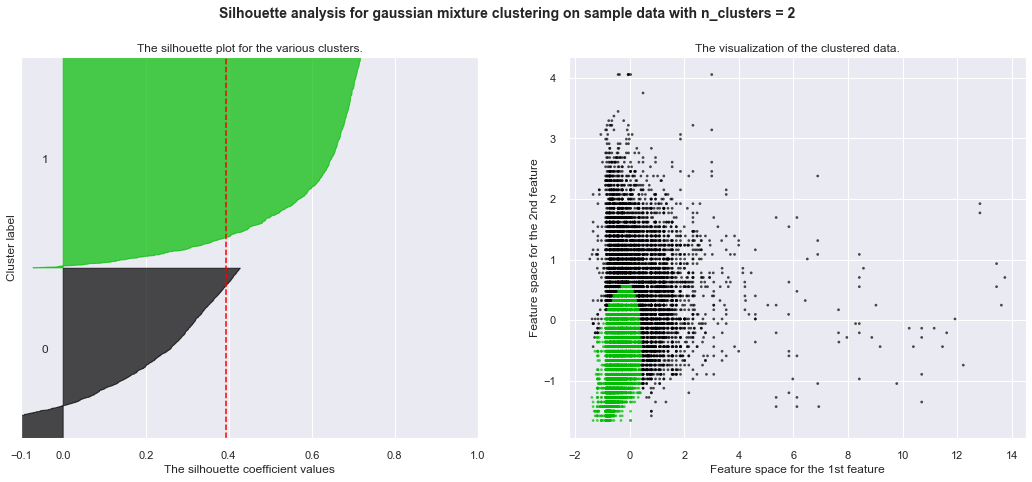

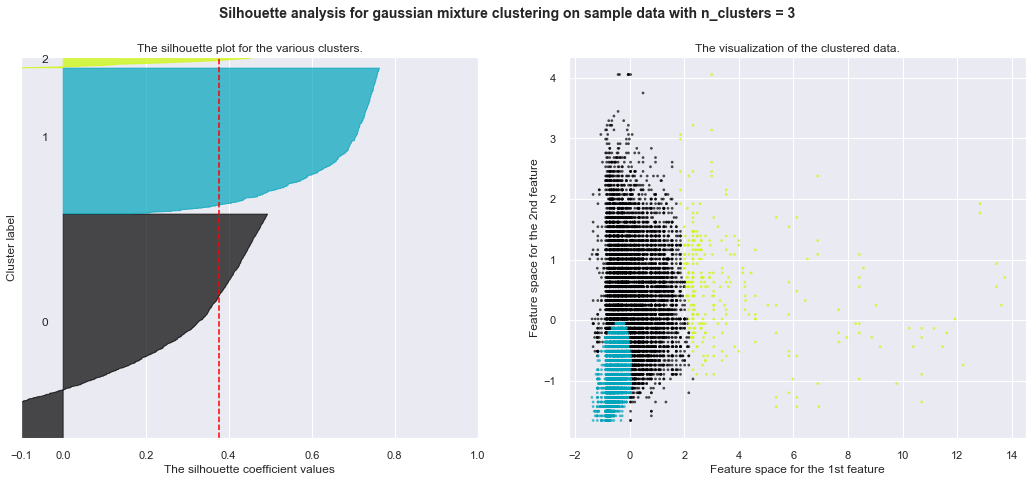

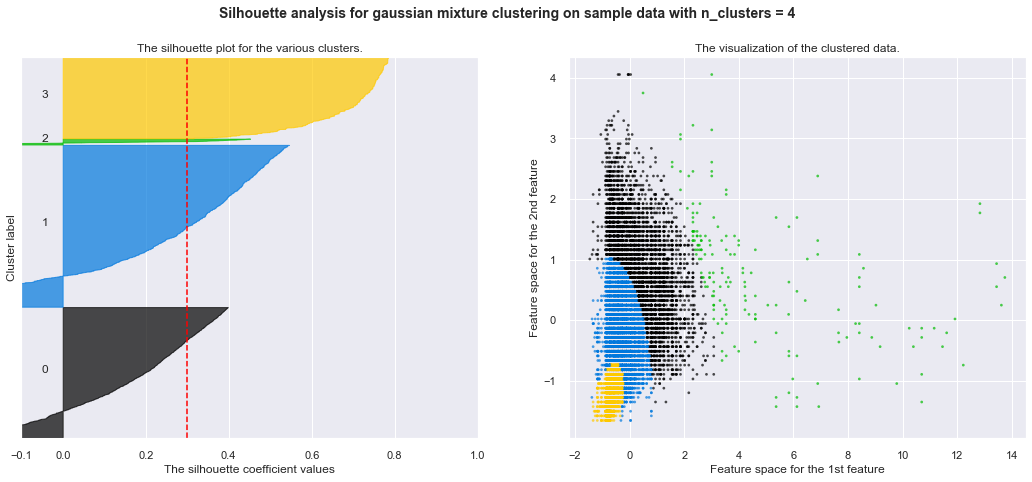

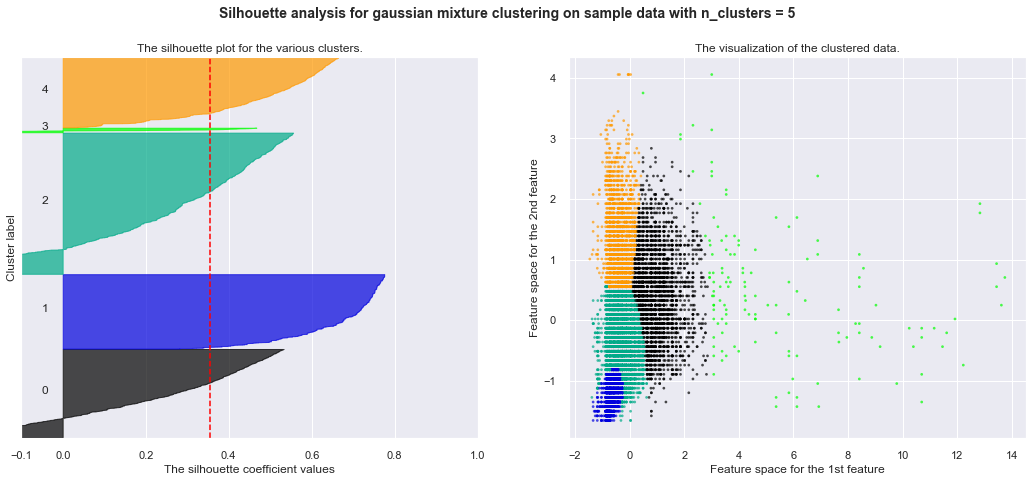

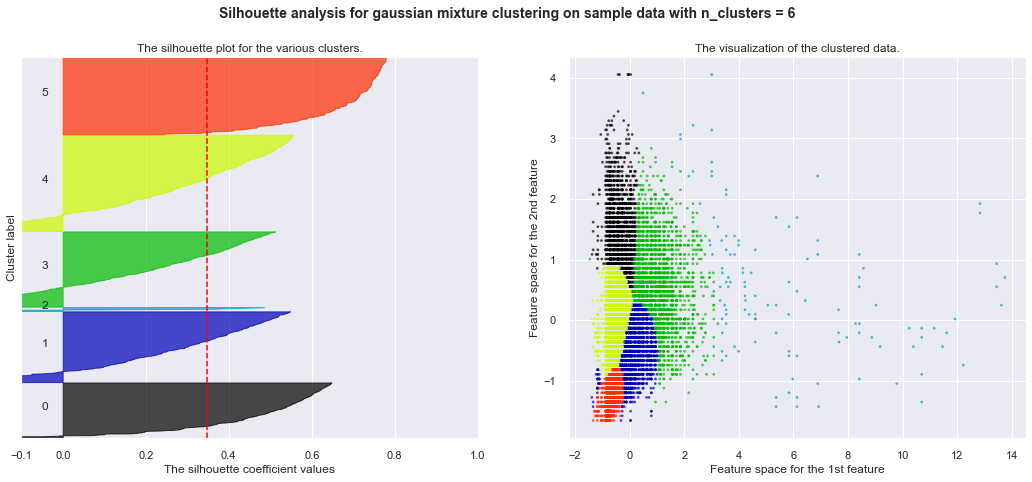

In [8]:
clustersList = [2,3,4,5,6]

for n_clusters in clustersList:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_features_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = mixture.GaussianMixture(n_components = n_clusters)
    cluster_labels = clusterer.fit_predict(scaled_features_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(scaled_features_df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(scaled_features_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        scaled_features_df['wage per hour'], scaled_features_df['age'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for gaussian mixture clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

According to the avaerage silhouette value, 2 clusters is the optimal number of clusters. However, I am certain that this dataset does not work well with either agglomarative or gaussian mixture clustering, since the data is rather clumpt up.

# DBSCAN

Next, I was interested in how the result would look like when using DBSCAN. It clusters by analyzing the density of the datapoints and clustering dens "areas" to one cluster.

For n_clusters = 3 The average silhouette_score is : 0.831382315968522
For n_clusters = 4 The average silhouette_score is : 0.8073964707933317
For n_clusters = 6 The average silhouette_score is : 0.5813245105612576
For n_clusters = 6 The average silhouette_score is : 0.43039374289619314
For n_clusters = 647 The average silhouette_score is : 0.12759955199950743


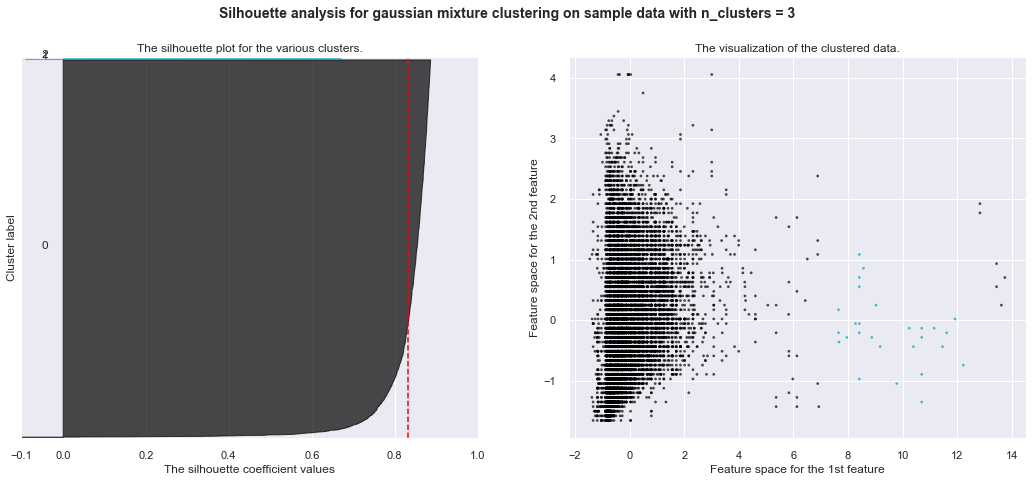

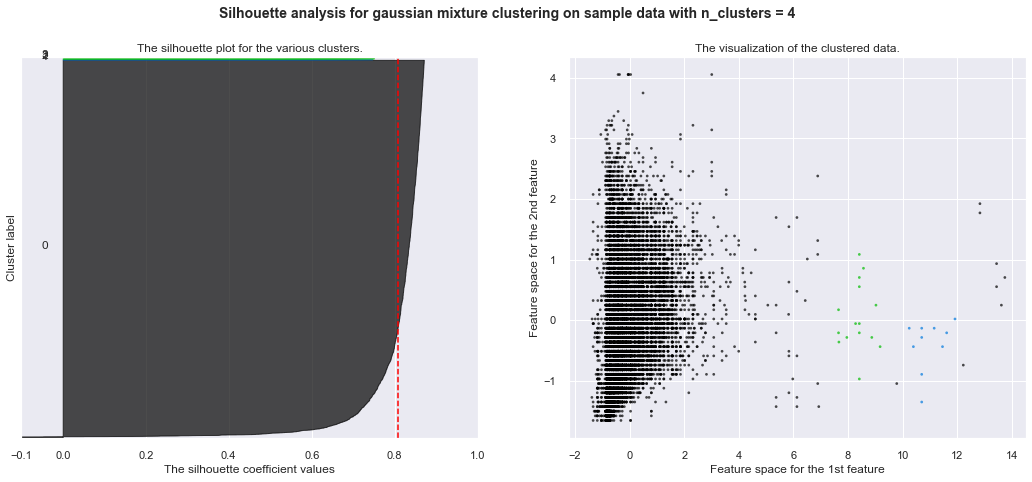

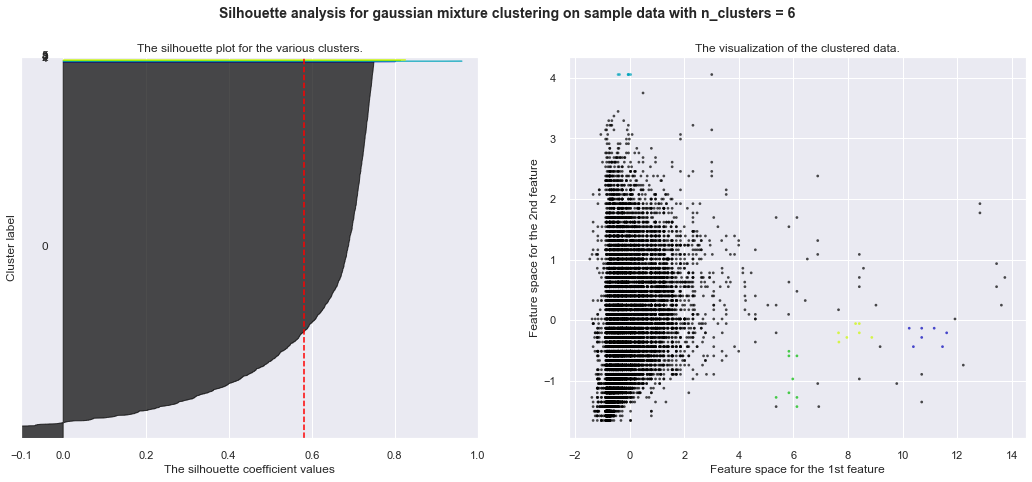

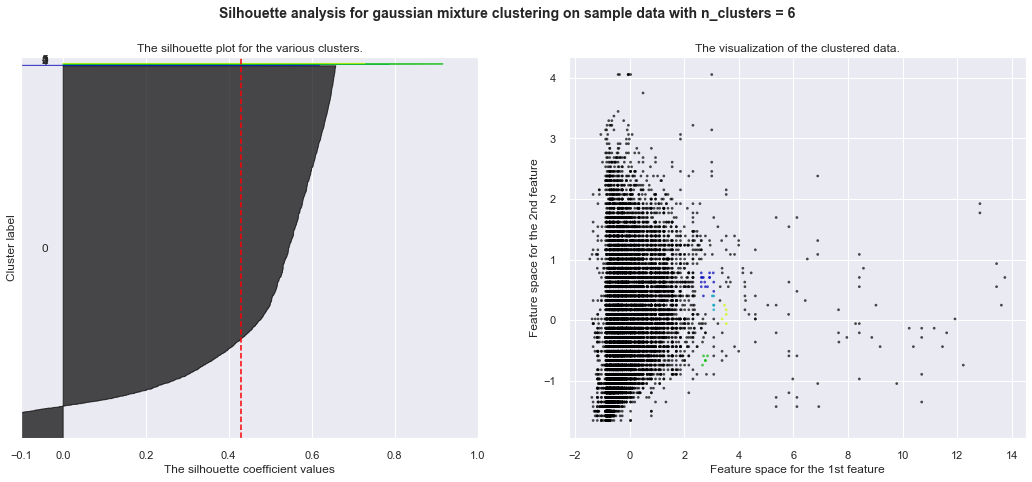

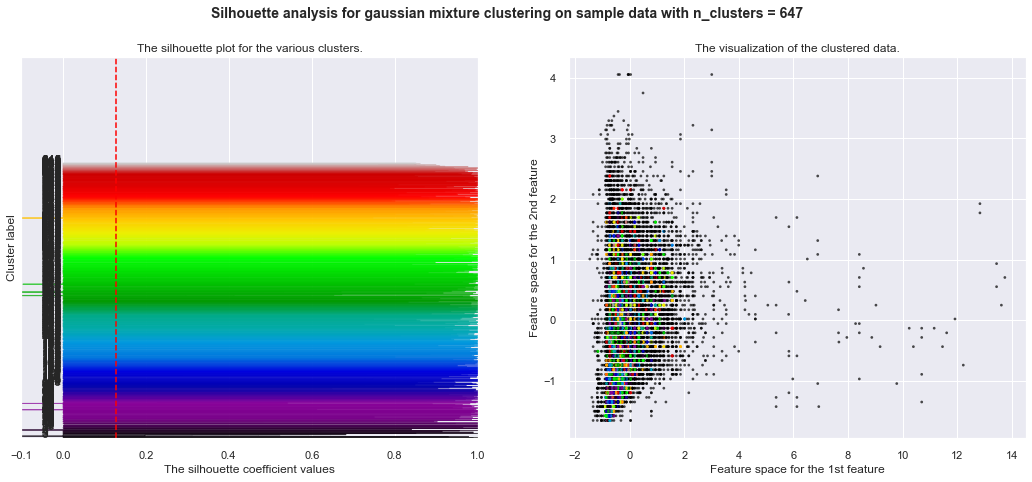

In [9]:
epsList = [1, 0.8, 0.5, 0.2, 0.01]

for eps in epsList:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = cluster.DBSCAN(algorithm='kd_tree', min_samples=5, eps=eps)
    cluster_labels = clusterer.fit_predict(scaled_features_df)
    _, counts = np.unique(cluster_labels, return_counts=True)
    n_clusters = len(counts)

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_features_df) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(scaled_features_df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(scaled_features_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        scaled_features_df['wage per hour'], scaled_features_df['age'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for gaussian mixture clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


    # db = cluster.DBSCAN(algorithm='kd_tree', min_samples=5, eps=eps)
    # clustering = db.fit_predict(scaled_features_df)
    # # Visualizing the clustering
    # plt.figure(figsize =(10,10))
    # plt.title('maximum distance: ' + str(eps))
    # plt.scatter(scaled_features_df['wage per hour'], scaled_features_df['age'], 
    #         c = clustering, cmap ='rainbow')
    # plt.show()

Using the silhouette analyzis of the results of the culstering achieved by DBSCAN, it is clear, that one big cluster (n_cluster is 3 but 2 of those clusters are nearly not visible) fits the data best. This is because the data shows only one big blob of datapoints in a dense formation.